In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import seaborn as sns
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("../Dataset2.csv")

data['target'] = data['target'].replace({'legitimate': 0, 'phishing': 1})

# Split the dataset into features (X) and the target variable (y)
X = data.drop('target', axis=1)  # Replace 'target_column' with the actual target column name
X = X.drop('url', axis=1)
y = data['target']

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Create a Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [4]:
y_pred = classifier.predict(X_test)


In [5]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9356955380577427
Precision: 0.9337455830388692
Recall: 0.9362267493356953
F1 Score: 0.934984520123839


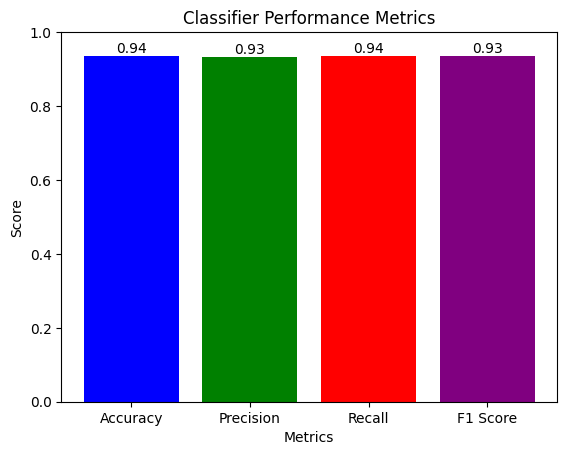

In [6]:
# Create a bar chart to visualize the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Classifier Performance Metrics')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for readability

# Display the scores on top of the bars
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()

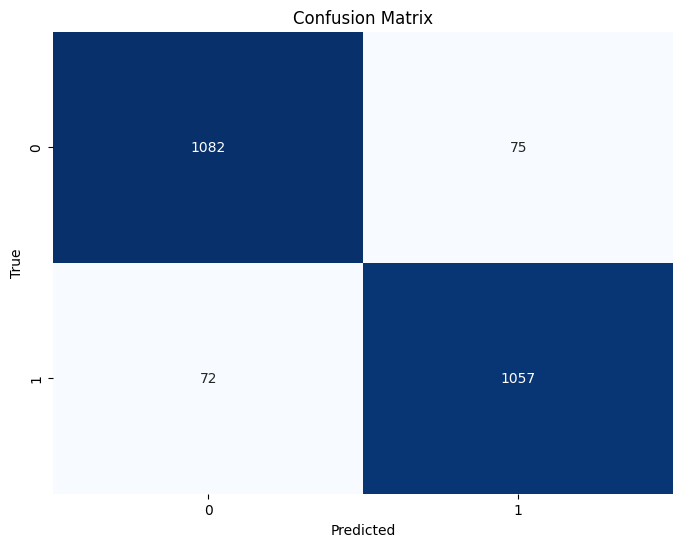

In [7]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


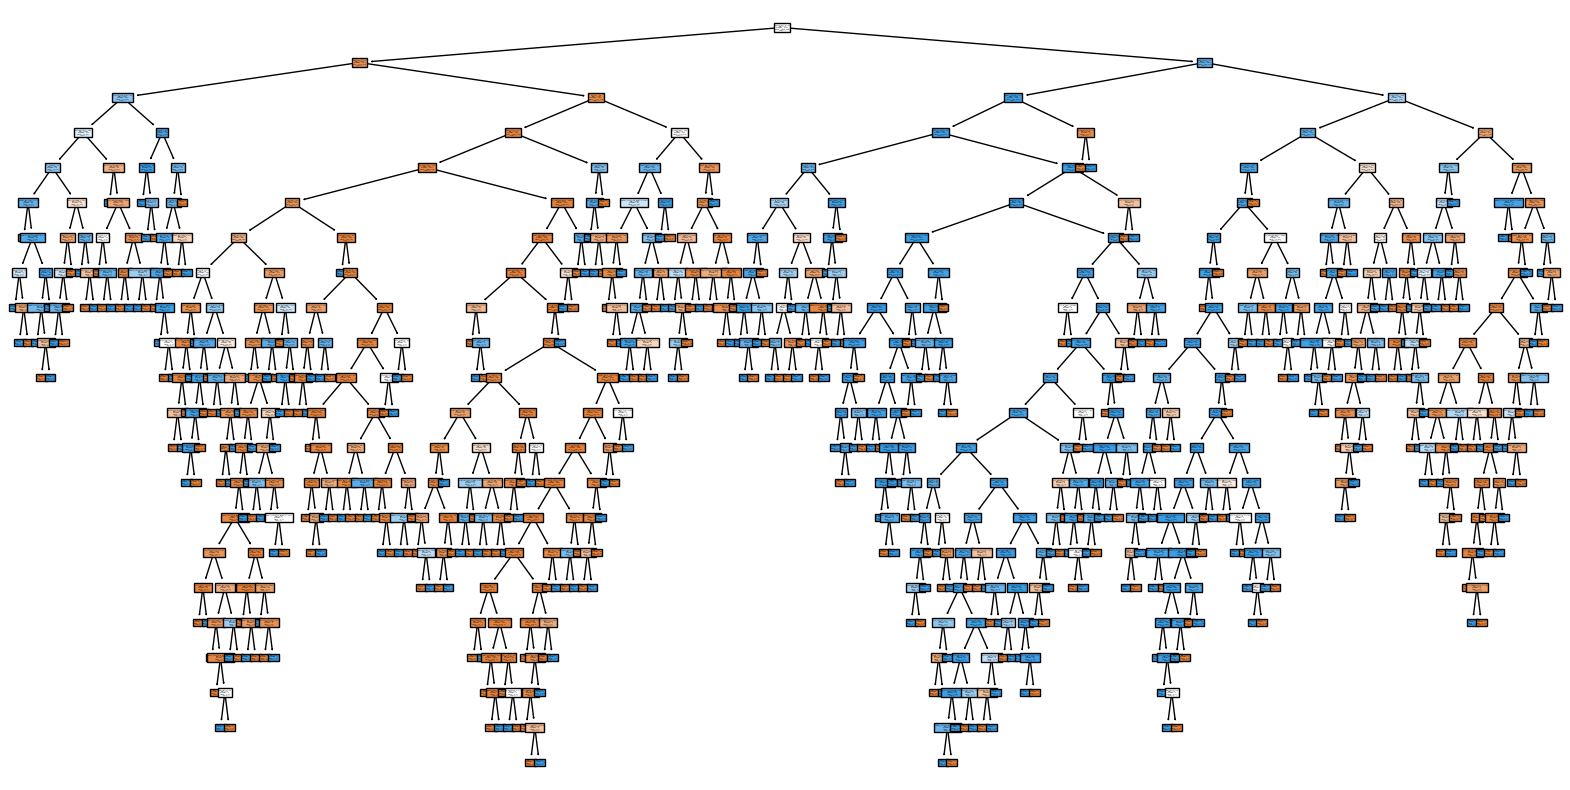

In [8]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(classifier, filled=True, feature_names=list(X.columns), class_names=list(map(str, classifier.classes_)))
plt.show()